IMPORT ALL LIBRARIES

In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
#conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitudevalues
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven'tcompleted the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

FETCHING THE COORDINATES OF PARK STREET FROM FOURSQUARE API

In [3]:
address = ' Park Street, Kolkata, IN '
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Park Street, Kolkata is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Park Street, Kolkata is 22.5551591, 88.3501171.


PLOT A MAP OF PARK STREET

In [4]:
Kolkata_map = folium.Map(location = [latitude, longitude], zoom_start = 15)
Kolkata_map

DEFINE FOUR SQUARE API

In [5]:
CLIENT_ID = 'O0QZED1VIJAAVEOB55E11KG0FNWTMYWST0LW4LJQK2LO0FRK' # your Foursquare ID
CLIENT_SECRET = 'XG4MOC51UF3DHGPAY1ETCH13BGSREUORD2V3SRBNOTKMARAR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: O0QZED1VIJAAVEOB55E11KG0FNWTMYWST0LW4LJQK2LO0FRK
CLIENT_SECRET:XG4MOC51UF3DHGPAY1ETCH13BGSREUORD2V3SRBNOTKMARAR


SEARCH RESTAURANTS WITHIN 5KM RADIUS OF PARK STREET 

In [8]:
search_query = 'restaurant'
print(search_query + ' .... OK!')

restaurant .... OK!


In [9]:
# type your answer here
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url# display URL

'https://api.foursquare.com/v2/venues/search?client_id=O0QZED1VIJAAVEOB55E11KG0FNWTMYWST0LW4LJQK2LO0FRK&client_secret=XG4MOC51UF3DHGPAY1ETCH13BGSREUORD2V3SRBNOTKMARAR&ll=22.5551591,88.3501171&v=20180605&query=restaurant&radius=5000&limit=200'

In [10]:
results = requests.get(url).json()

In [11]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4d610c06865a224b2f7bb285,"17, Jawaharlal Nehru Rd",IN,Kolkata,India,NaN,575,"[17, Jawaharlal Nehru Rd, Kolkata 700087, West...","[{'label': 'display', 'lat': 22.56004351018036...",22.560044,88.351965,NaN,700087,West Bengal,New Cathay Bar and Restaurant,v-1580617161
1,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4f758265e4b05b707438236a,"17-G, Park St",IN,Kolkata,India,NaN,480,"[17-G, Park St, Kolkata 700016, West Bengal, I...","[{'label': 'display', 'lat': 22.55685807615723...",22.556858,88.354414,NaN,700016,West Bengal,Radhuni Restaurant,v-1580617161
2,"[{'id': '54135bf5e4b08f3d2429dff4', 'name': 'M...",False,4c110a3a81e976b0291410eb,"135, Park St",IN,Kolkata,India,NaN,1525,"[135, Park St, Kolkata 700016, West Bengal, In...","[{'label': 'display', 'lat': 22.54653553354920...",22.546536,88.361654,NaN,700016,West Bengal,Shiraz Golden Restaurant,v-1580617161
3,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",False,517d415de4b0a8be74b14087,"33, Bentinck St",IN,Kolkata,India,NaN,1329,"[33, Bentinck St, Kolkata 700069, West Bengal,...","[{'label': 'display', 'lat': 22.567, 'lng': 88...",22.567000,88.351800,NaN,700069,West Bengal,Kamal Restaurant,v-1580617161
4,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",False,564caa1f498eec190f6a685c,"21, Park St",IN,Kolkata,India,NaN,273,"[21, Park St, Kolkata 700016, West Bengal, India]","[{'label': 'display', 'lat': 22.55340448333672...",22.553404,88.351977,NaN,700016,West Bengal,Khandani Rajdhani Restaurant,v-1580617161


CLEANING DATA

In [12]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,New Cathay Bar and Restaurant,Chinese Restaurant,"17, Jawaharlal Nehru Rd",IN,Kolkata,India,NaN,575,"[17, Jawaharlal Nehru Rd, Kolkata 700087, West...","[{'label': 'display', 'lat': 22.56004351018036...",22.560044,88.351965,NaN,700087,West Bengal,4d610c06865a224b2f7bb285
1,Radhuni Restaurant,Indian Restaurant,"17-G, Park St",IN,Kolkata,India,NaN,480,"[17-G, Park St, Kolkata 700016, West Bengal, I...","[{'label': 'display', 'lat': 22.55685807615723...",22.556858,88.354414,NaN,700016,West Bengal,4f758265e4b05b707438236a
2,Shiraz Golden Restaurant,Mughlai Restaurant,"135, Park St",IN,Kolkata,India,NaN,1525,"[135, Park St, Kolkata 700016, West Bengal, In...","[{'label': 'display', 'lat': 22.54653553354920...",22.546536,88.361654,NaN,700016,West Bengal,4c110a3a81e976b0291410eb
3,Kamal Restaurant,Vegetarian / Vegan Restaurant,"33, Bentinck St",IN,Kolkata,India,NaN,1329,"[33, Bentinck St, Kolkata 700069, West Bengal,...","[{'label': 'display', 'lat': 22.567, 'lng': 88...",22.567000,88.351800,NaN,700069,West Bengal,517d415de4b0a8be74b14087
4,Khandani Rajdhani Restaurant,Vegetarian / Vegan Restaurant,"21, Park St",IN,Kolkata,India,NaN,273,"[21, Park St, Kolkata 700016, West Bengal, India]","[{'label': 'display', 'lat': 22.55340448333672...",22.553404,88.351977,NaN,700016,West Bengal,564caa1f498eec190f6a685c


PLOT THE MAP OF REATAURANTS

In [13]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Park Street',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered['lat'], dataframe_filtered['lng'], dataframe_filtered['name']):

    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

USE ZOMATO API FOR GETTING THE RATING DATA

In [14]:
headers = {'user-key': '1b6587fe6dc44f7e67b298b435b08504'}
venues_information = []

for index, row in dataframe_filtered.iterrows():
    #print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    result
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    
zomato_venues = pd.DataFrame(venues_information, columns = ['venue', 'latitude', 'longitude', 'price_for_two', 'price_range', 'rating'])


In [15]:
zomato_venues.head()

,venue,latitude,longitude,price_for_two,price_range,rating
0,Shakes & Sandwich,22.5600958360,88.3516866714,250,1,3.2
1,Prince Restaurant,22.5569698770,88.3546907455,600,2,3.4
2,Shiraz Golden Restaurant,22.5464514460,88.3616618067,500,2,4.1
3,Kamal's Veg Restaurant,22.5669881147,88.3521121368,600,2,3.5
4,Metro Icecream,22.5534215056,88.3520246297,100,1,3.7


COMBINE TWO DATFRAME

In [16]:
dataframe_filtered['lat'] = dataframe_filtered['lat'].apply(lambda lat: round(float(lat), 4))
dataframe_filtered['lng'] = dataframe_filtered['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

In [17]:
dataset = pd.concat([dataframe_filtered, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [18]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,venue,latitude,longitude,price_for_two,price_range,rating,lat_diff,lng_diff
0,New Cathay Bar and Restaurant,Chinese Restaurant,"17, Jawaharlal Nehru Rd",IN,Kolkata,India,NaN,575,"[17, Jawaharlal Nehru Rd, Kolkata 700087, West...","[{'label': 'display', 'lat': 22.56004351018036...",22.5600,88.3520,NaN,700087,West Bengal,4d610c06865a224b2f7bb285,Shakes & Sandwich,22.5601,88.3517,250,1,3.2,0.0001,-0.0003
1,Radhuni Restaurant,Indian Restaurant,"17-G, Park St",IN,Kolkata,India,NaN,480,"[17-G, Park St, Kolkata 700016, West Bengal, I...","[{'label': 'display', 'lat': 22.55685807615723...",22.5569,88.3544,NaN,700016,West Bengal,4f758265e4b05b707438236a,Prince Restaurant,22.5570,88.3547,600,2,3.4,0.0001,0.0003
2,Shiraz Golden Restaurant,Mughlai Restaurant,"135, Park St",IN,Kolkata,India,NaN,1525,"[135, Park St, Kolkata 700016, West Bengal, In...","[{'label': 'display', 'lat': 22.54653553354920...",22.5465,88.3617,NaN,700016,West Bengal,4c110a3a81e976b0291410eb,Shiraz Golden Restaurant,22.5465,88.3617,500,2,4.1,0.0000,0.0000
3,Kamal Restaurant,Vegetarian / Vegan Restaurant,"33, Bentinck St",IN,Kolkata,India,NaN,1329,"[33, Bentinck St, Kolkata 700069, West Bengal,...","[{'label': 'display', 'lat': 22.567, 'lng': 88...",22.5670,88.3518,NaN,700069,West Bengal,517d415de4b0a8be74b14087,Kamal's Veg Restaurant,22.5670,88.3521,600,2,3.5,0.0000,0.0003
4,Khandani Rajdhani Restaurant,Vegetarian / Vegan Restaurant,"21, Park St",IN,Kolkata,India,NaN,273,"[21, Park St, Kolkata 700016, West Bengal, India]","[{'label': 'display', 'lat': 22.55340448333672...",22.5534,88.3520,NaN,700016,West Bengal,564caa1f498eec190f6a685c,Metro Icecream,22.5534,88.3520,100,1,3.7,0.0000,0.0000
5,Waldorf Restaurant,Chinese Restaurant,"13D, Anandilal Poddar Sarani",IN,Kolkata,India,NaN,260,"[13D, Anandilal Poddar Sarani, Kolkata 700071,...","[{'label': 'display', 'lat': 22.55304839497467...",22.5530,88.3512,NaN,700071,West Bengal,4df38ca562e1288ed30441d7,Waldorf,22.5532,88.3514,1000,3,3.5,0.0002,0.0002
6,Kasturi Restaurant (Dhakai Bengali Cuisine),Asian Restaurant,"7/A, Mustaque Ahmed St",IN,Kolkata,India,NaN,523,"[7/A, Mustaque Ahmed St, Kolkata 700016, West ...","[{'label': 'display', 'lat': 22.55684819349172...",22.5568,88.3549,NaN,700016,West Bengal,4fad6ce3e4b03525f3272c18,Radhuni Restaurant,22.5567,88.3548,500,2,3.4,-0.0001,-0.0001
7,Oasis Restaurant,North Indian Restaurant,"33, Park St",IN,Kolkata,India,NaN,333,"[33, Park St, Kolkata 700016, West Bengal, India]","[{'label': 'display', 'lat': 22.55311775338211...",22.5531,88.3525,Park Street - Taltola - Shakespeare Sarani,700016,West Bengal,50d0b0d7e4b0c72c9db54b59,Oasis,22.5531,88.3523,900,2,3.8,0.0000,-0.0002
8,Tripty's Bar & Restaurant,Restaurant,"31A, Ashutosh Mukherjee Rd",IN,Kolkata,India,NaN,2455,"[31A, Ashutosh Mukherjee Rd, Kolkata 700020, W...","[{'label': 'display', 'lat': 22.53340865499684...",22.5334,88.3461,NaN,700020,West Bengal,51ffaa2b498e65ca19d7d723,Tripty's Bar & Restaurant,22.5335,88.3464,500,2,3.6,0.0001,0.0003
9,"Mini Restaurant, Esplande",Tea Room,NaN,IN,NaN,India,NaN,428,[India],"[{'label': 'display', 'lat': 22.55765256069629...",22.5577,88.3533,NaN,NaN,NaN,51ab4e6a498eb1a56b217df9,Congo Bong Restaurant & Cafe,22.5573,88.3535,200,1,0,-0.0004,0.0002


DROP UNNECESSARY COLUMNS FROM THE DATAFRAME

In [19]:
selected_venues = selected_venues.drop(columns = ['cc', 'crossStreet', 'distance', 'formattedAddress', 'labeledLatLngs', 'lat', 'lng', 'neighborhood', 'id', 'venue', 'lat_diff', 'lng_diff'])
selected_venues.head(5)

,name,categories,address,city,country,postalCode,state,latitude,longitude,price_for_two,price_range,rating
0,New Cathay Bar and Restaurant,Chinese Restaurant,"17, Jawaharlal Nehru Rd",Kolkata,India,700087,West Bengal,22.5601,88.3517,250,1,3.2
1,Radhuni Restaurant,Indian Restaurant,"17-G, Park St",Kolkata,India,700016,West Bengal,22.5570,88.3547,600,2,3.4
2,Shiraz Golden Restaurant,Mughlai Restaurant,"135, Park St",Kolkata,India,700016,West Bengal,22.5465,88.3617,500,2,4.1
3,Kamal Restaurant,Vegetarian / Vegan Restaurant,"33, Bentinck St",Kolkata,India,700069,West Bengal,22.5670,88.3521,600,2,3.5
4,Khandani Rajdhani Restaurant,Vegetarian / Vegan Restaurant,"21, Park St",Kolkata,India,700016,West Bengal,22.5534,88.3520,100,1,3.7


DROP VENUES WITH RATING 0

In [20]:
selected_venues = selected_venues[selected_venues['rating'] != 0.0]
print("Total venues available: {}".format(selected_venues.shape[0]))

Total venues available: 29


BAR PLOT FOR COUNT OF VENUES WITH GIVEN RATING

Text(0.5, 1.0, 'Count of venues with given rating')

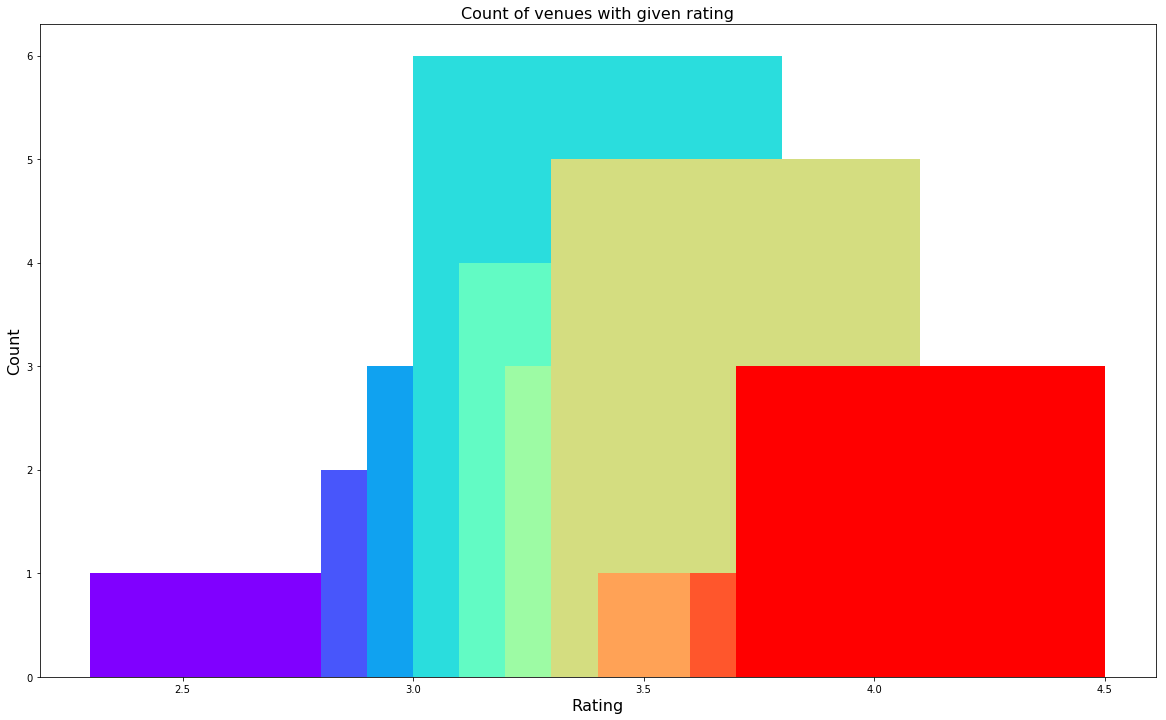

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

PLOT THE PRICE RANGE OF VENUES

Text(0.5, 1.0, 'Count of venues with given price_range')

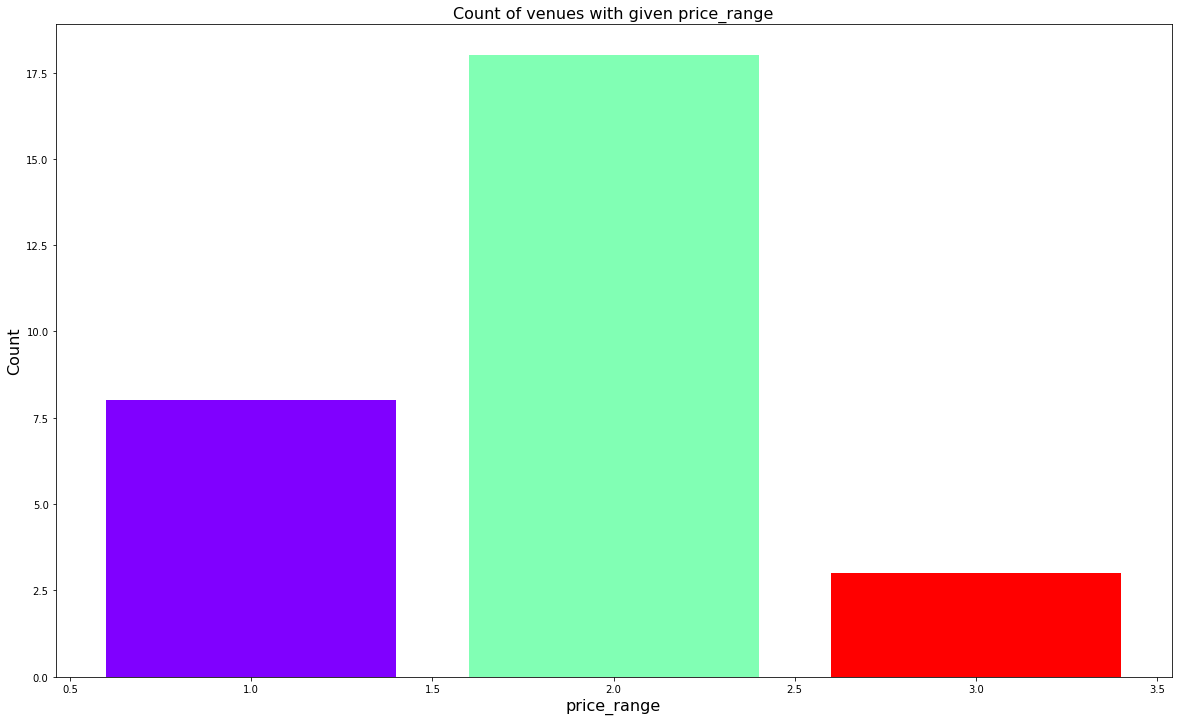

In [24]:
selected_venues['price_range'] = selected_venues['price_range'].astype(int)
price_range = selected_venues['price_range'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(price_range.index, price_range.values, color = cm.rainbow(np.linspace(0, 1, len(price_range.index))))
plt.xlabel("price_range", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given price_range", fontsize = 16)

CLASSIFY THE VENUES WITH RATINGS

In [25]:
bins = [0.5, 1.5, 2.5, 3.5, 4.5]
labels = ['Low', 'Okey', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)
selected_venues

,name,categories,address,city,country,postalCode,state,latitude,longitude,price_for_two,price_range,rating,rating_bin
0,New Cathay Bar and Restaurant,Chinese Restaurant,"17, Jawaharlal Nehru Rd",Kolkata,India,700087,West Bengal,22.5601,88.3517,250,1,3.2,Good
1,Radhuni Restaurant,Indian Restaurant,"17-G, Park St",Kolkata,India,700016,West Bengal,22.5570,88.3547,600,2,3.4,Good
2,Shiraz Golden Restaurant,Mughlai Restaurant,"135, Park St",Kolkata,India,700016,West Bengal,22.5465,88.3617,500,2,4.1,Very good
3,Kamal Restaurant,Vegetarian / Vegan Restaurant,"33, Bentinck St",Kolkata,India,700069,West Bengal,22.5670,88.3521,600,2,3.5,Good
4,Khandani Rajdhani Restaurant,Vegetarian / Vegan Restaurant,"21, Park St",Kolkata,India,700016,West Bengal,22.5534,88.3520,100,1,3.7,Very good
5,Waldorf Restaurant,Chinese Restaurant,"13D, Anandilal Poddar Sarani",Kolkata,India,700071,West Bengal,22.5532,88.3514,1000,3,3.5,Good
6,Kasturi Restaurant (Dhakai Bengali Cuisine),Asian Restaurant,"7/A, Mustaque Ahmed St",Kolkata,India,700016,West Bengal,22.5567,88.3548,500,2,3.4,Good
7,Oasis Restaurant,North Indian Restaurant,"33, Park St",Kolkata,India,700016,West Bengal,22.5531,88.3523,900,2,3.8,Very good
8,Tripty's Bar & Restaurant,Restaurant,"31A, Ashutosh Mukherjee Rd",Kolkata,India,700020,West Bengal,22.5335,88.3464,500,2,3.6,Very good
10,Khalsa Restaurant,Indian Restaurant,Madge Ln,Kolkata,India,700016,West Bengal,22.5587,88.3527,400,1,3.5,Good


In [26]:
color_map = {'Low': 'red', 'Okay': 'yellow', 'Good': 'green', 'Very good': 'blue'}

venues_map = folium.Map(location=[latitude, longitude], zoom_start=14)
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Park Street',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['name'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(venues_map)  

#chandigarh_map.save("maps/Venues Ratings.html")
venues_map

CLUSTERING THE VENUES

In [27]:
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 3

clustering = selected_venues.drop(['name', 'address', 'rating_bin', 'categories', 'state', 'country', 'city', 'postalCode'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues.head(10)

,cluster_labels,name,categories,address,city,country,postalCode,state,latitude,longitude,price_for_two,price_range,rating,rating_bin
0,0,New Cathay Bar and Restaurant,Chinese Restaurant,"17, Jawaharlal Nehru Rd",Kolkata,India,700087,West Bengal,22.5601,88.3517,250,1,3.2,Good
1,0,Radhuni Restaurant,Indian Restaurant,"17-G, Park St",Kolkata,India,700016,West Bengal,22.5570,88.3547,600,2,3.4,Good
2,0,Shiraz Golden Restaurant,Mughlai Restaurant,"135, Park St",Kolkata,India,700016,West Bengal,22.5465,88.3617,500,2,4.1,Very good
3,0,Kamal Restaurant,Vegetarian / Vegan Restaurant,"33, Bentinck St",Kolkata,India,700069,West Bengal,22.5670,88.3521,600,2,3.5,Good
4,0,Khandani Rajdhani Restaurant,Vegetarian / Vegan Restaurant,"21, Park St",Kolkata,India,700016,West Bengal,22.5534,88.3520,100,1,3.7,Very good
5,2,Waldorf Restaurant,Chinese Restaurant,"13D, Anandilal Poddar Sarani",Kolkata,India,700071,West Bengal,22.5532,88.3514,1000,3,3.5,Good
6,0,Kasturi Restaurant (Dhakai Bengali Cuisine),Asian Restaurant,"7/A, Mustaque Ahmed St",Kolkata,India,700016,West Bengal,22.5567,88.3548,500,2,3.4,Good
7,2,Oasis Restaurant,North Indian Restaurant,"33, Park St",Kolkata,India,700016,West Bengal,22.5531,88.3523,900,2,3.8,Very good
8,0,Tripty's Bar & Restaurant,Restaurant,"31A, Ashutosh Mukherjee Rd",Kolkata,India,700020,West Bengal,22.5335,88.3464,500,2,3.6,Very good
10,0,Khalsa Restaurant,Indian Restaurant,Madge Ln,Kolkata,India,700016,West Bengal,22.5587,88.3527,400,1,3.5,Good


In [28]:
result = selected_venues[selected_venues['cluster_labels'] == 0]
print("Cluster 0")
result.head(10).reset_index(drop = True)

Cluster 0


,cluster_labels,name,categories,address,city,country,postalCode,state,latitude,longitude,price_for_two,price_range,rating,rating_bin
0,0,New Cathay Bar and Restaurant,Chinese Restaurant,"17, Jawaharlal Nehru Rd",Kolkata,India,700087,West Bengal,22.5601,88.3517,250,1,3.2,Good
1,0,Radhuni Restaurant,Indian Restaurant,"17-G, Park St",Kolkata,India,700016,West Bengal,22.5570,88.3547,600,2,3.4,Good
2,0,Shiraz Golden Restaurant,Mughlai Restaurant,"135, Park St",Kolkata,India,700016,West Bengal,22.5465,88.3617,500,2,4.1,Very good
3,0,Kamal Restaurant,Vegetarian / Vegan Restaurant,"33, Bentinck St",Kolkata,India,700069,West Bengal,22.5670,88.3521,600,2,3.5,Good
4,0,Khandani Rajdhani Restaurant,Vegetarian / Vegan Restaurant,"21, Park St",Kolkata,India,700016,West Bengal,22.5534,88.3520,100,1,3.7,Very good
5,0,Kasturi Restaurant (Dhakai Bengali Cuisine),Asian Restaurant,"7/A, Mustaque Ahmed St",Kolkata,India,700016,West Bengal,22.5567,88.3548,500,2,3.4,Good
6,0,Tripty's Bar & Restaurant,Restaurant,"31A, Ashutosh Mukherjee Rd",Kolkata,India,700020,West Bengal,22.5335,88.3464,500,2,3.6,Very good
7,0,Khalsa Restaurant,Indian Restaurant,Madge Ln,Kolkata,India,700016,West Bengal,22.5587,88.3527,400,1,3.5,Good
8,0,Hong Kong Chinese Restaurant,Chinese Restaurant,"44, Mirza Ghalib St",Kolkata,India,700016,West Bengal,22.5567,88.3548,500,2,3.4,Good
9,0,Dreamland Restaurant,Indian Restaurant,NaN,Kolkata,India,NaN,West Bengal,22.5505,88.3552,500,2,3.7,Very good


In [29]:
print("These venues for cluster 0 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 0 have mean price range of 1.65 and rating spread around 3.57


In [30]:
result = selected_venues[selected_venues['cluster_labels'] == 1]
print("Cluster 1")
result.head(10).reset_index(drop = True)

Cluster 1


,cluster_labels,name,categories,address,city,country,postalCode,state,latitude,longitude,price_for_two,price_range,rating,rating_bin
0,1,Beijing Restaurant,Chinese Restaurant,"77/1, Christopher Rd",Kolkata,India,700046,West Bengal,22.5465,88.3872,1800,3,4.0,Very good


In [31]:
print("These venues for cluster 1 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 1 have mean price range of 3.00 and rating spread around 4.00


In [32]:
result = selected_venues[selected_venues['cluster_labels'] == 2]
print("Cluster 2")
result.head(10).reset_index(drop = True)

Cluster 2


,cluster_labels,name,categories,address,city,country,postalCode,state,latitude,longitude,price_for_two,price_range,rating,rating_bin
0,2,Waldorf Restaurant,Chinese Restaurant,"13D, Anandilal Poddar Sarani",Kolkata,India,700071,West Bengal,22.5532,88.3514,1000,3,3.5,Good
1,2,Oasis Restaurant,North Indian Restaurant,"33, Park St",Kolkata,India,700016,West Bengal,22.5531,88.3523,900,2,3.8,Very good
2,2,Elfin Bar & Restaurant,Restaurant,"5, Meredith St",Kolkata,India,700001,West Bengal,22.5671,88.3527,850,2,3.3,Good
3,2,Mehfil Bar & Restaurant,Bar,"233/5, Acharya Jagadish Chandra Bose Rd",Kolkata,India,700020,West Bengal,22.5413,88.3528,1000,3,2.7,Good
4,2,Guru's Restaurant & Bar,Restaurant,"103, Netaji Subash Nagar Colony, Biswa Bangla ...",Kolkata,India,700100,West Bengal,22.5238,88.3973,700,2,3.3,Good


In [33]:
print("These venues for cluster 2 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 2 have mean price range of 2.40 and rating spread around 3.32


PLOT THE CLUSTER

In [34]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=14)
color_map = { 0: 'green', 1: 'red', 2: 'blue'}

# add venues to the map
markers_colors = []
for name, address, cluster, latitude, longitude in zip(selected_venues['name'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels'], 
                                                        selected_venues['latitude'], 
                                                        selected_venues['longitude']):
    label = folium.Popup(str(name) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(venues_map)

# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(venues_map)

#chandigarh_map.save("maps/Venues Clusters.html")
venues_map